In [46]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

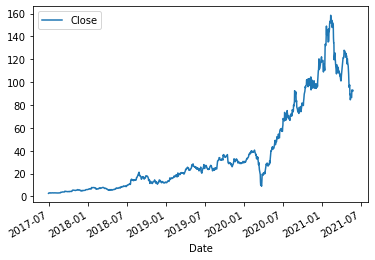

In [47]:
# load dataset
series = read_csv('APT.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series= series[['Close']]
series.plot()
pyplot.show()

In [48]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [49]:
# train autoregression
window = 29
model = AutoReg(train, lags=7)
model_fit = model.fit()
coef = model_fit.params

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [50]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
for d in range(window):
    yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=82.375368, expected=92.730003
predicted=89.607584, expected=92.730003
predicted=97.733406, expected=92.730003
predicted=98.579089, expected=92.730003
predicted=83.148813, expected=92.730003
predicted=79.492103, expected=92.730003
predicted=85.116990, expected=92.730003


IndexError: index 8 is out of bounds for axis 0 with size 8

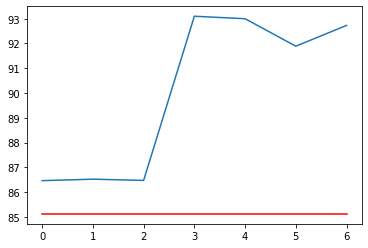

In [51]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [19]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=85.120056, expected=86.459999
predicted=85.130636, expected=86.519997
predicted=85.642418, expected=86.470001
predicted=83.859702, expected=93.099998
predicted=83.599846, expected=93.000000
predicted=83.350099, expected=91.889999
predicted=83.990259, expected=92.730003
Test RMSE: 6.840


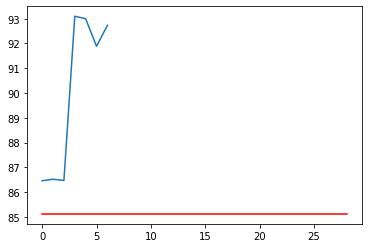

In [26]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

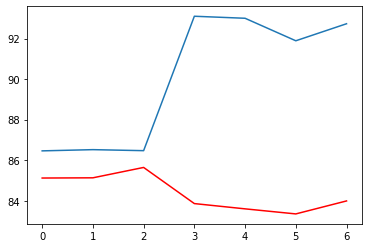

In [20]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()